# Exercise Six: Structured Data with Beautiful Soup and Pandas

For this example of the completed exercise, I implemented the bonus stage to iterate through multiple pages. Note that this is not the "final form" solution - ideally, we would first scrape all the names from the main page in the journalg, and use that to construct all of the URLs to pull a more robust dataset for analysis. Consider trying that expansion on your own.

This example will:

    - Grab the content from several articles in Digital Humanities Quarterly
    - Demonstrate some ways of visualizing this type of data
    - Save a visualization of an interesting element

## Stage One - Import the libraries and Scrape Structured Data from Multiple Pages¶

For the bonus exercise, I've combined stage one with the original stage two and three. This allows for more easily scraping the structured data from each page, and gives us content to visualize and compare. Unlike the reviews, where each page contained multiple elements, this structure treats every page (article) as an entity.

In [44]:
#import libraries and set up the scraping target
import requests
from bs4 import BeautifulSoup
import pandas as pd

urls = ['http://digitalhumanities.org:8081/dhq/vol/14/4/000499/000499.html', 'http://digitalhumanities.org:8081/dhq/vol/14/4/000532/000532.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000518/000518.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000498/000498.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000518/000518.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000497/000497.html','http://digitalhumanities.org:8081/dhq/vol/14/4/000495/000495.html']

user_agent = {'User-agent': 'Mozilla/5.0'}

## Stage Two: Define an Empty Dictionary Reflecting the Data Categories

In [45]:
# define the empty dictionary based on properties usually included in an article

article_dict = {'title':[], 'first_author':[], 'issue':[], 'abstract':[]}

## Stage Three: Loop through and Store Structured Data

In [46]:
#scrape the structured content and add to the articles dictionary, looping through each url
for url in urls:

    response = requests.get(url, headers = user_agent)
    article = BeautifulSoup(response.text, 'html.parser')

    article_dict['title'].append(article.find('h1', class_='articleTitle lang en').text)
    article_dict['first_author'].append(article.find('div', class_='author').find('a').text)
    article_dict['issue'].append(article.find('div', class_='toolbar').find('a').text)
    article_dict['abstract'].append(article.find('div', id='abstract').find('p').text)
    
print(article_dict['title'])
print(article_dict['first_author'])
print(article_dict['issue'])
print(article_dict['abstract'])

['The Voices of Doctor Who â\x80\x93 How Stylometry Can be\n               Useful in Revealing New Information About TV Series', 'Film and Video Analysis in the Digital Humanities â\x80\x93\n               An Interdisciplinary Dialog', 'Automated Visual Content Analysis for Film Studies:\n               Current Status and Challenges', 'The Stylometry of Film Dialogue: Pros and\n               Pitfalls', 'Automated Visual Content Analysis for Film Studies:\n               Current Status and Challenges', 'Exploring Digitised Moving Image Collections: The\n               SEMIA Project, Visual Analysis and the Turn to Abstraction', 'The Phenomenon of Interwar City\n                              Symphonies: A Combined Methodology of Digital Tools and Traditional\n                              Film Analysis Methods to Study Visual Motifs and Structural Patterns\n                              of Experimental-Documentary City Films']
['Joanna Byszuk\n               ', 'Manuel Burghardt\n      

## Stage Four: Convert from Dictionary to DataFrame and Display¶

In [47]:
articles = pd.DataFrame(article_dict)
pd.set_option("display.max_colwidth", None)

articles

,title,first_author,issue,abstract
0,The Voices of Doctor Who â How Stylometry Can be\n Useful in Revealing New Information About TV Series,Joanna Byszuk\n,2020 14.4,"This article presents possibilities of effectively using stylometric methods popular\n in the analysis of literary texts in the study of texts written for television, on\n the example of Doctor Who. The article examines the changes driving the development\n of the show moving from character-oriented in the so-called âClassic Whoâ\n (1963-1989) to showrunner-oriented in its revival started in 2005. It also seeks to\n describe stability of the characterization of the protagonist as evidenced in the\n dialogues, and to discuss authorial relations between showrunners and their teams."
1,Film and Video Analysis in the Digital Humanities â\n An Interdisciplinary Dialog,Manuel Burghardt\n,2020 14.4,"This editorial introduces the special issue on âDigital Humanities & Film Studies: Analyzing the Modalities of Moving Images,â which contains a total of eight exciting contributions. Moreover, this editorial aims to highlight the complementary disciplinary perspectives on the computer-aided analysis of moving images, which are important prerequisites to better understand and situate a common DH perspective"
2,Automated Visual Content Analysis for Film Studies:\n Current Status and Challenges,Kader Pustu-Iren\n,2020 14.4,"Lots of approaches for automated video analysis have been suggested since the\n 1990ies, which have the potential to support quantitative and qualitative analysis in\n film studies. However, software solutions for the scholarly study of film that\n utilise video analysis algorithms are still relatively rare. In this paper, we aim to\n provide an overview of related work in this field, review current developments in\n computer vision, compare machine and human performance for some visual recognition\n tasks, and outline the requirements for video analysis software that would optimally\n support scholars of film studies."
3,The Stylometry of Film Dialogue: Pros and\n Pitfalls,Agata HoÅobut\n,2020 14.4,"We examine film dialogue with quantitative textual analysis (stylometry, sentiment\n analysis, distant reading). Working with transcribed dialogue in almost 300\n productions, we explore the complex way in which most-frequent-words-based stylometry\n and lexicon-based sentiment analysis produce patterns of similarity and difference\n between screenwriters and/or a priori IMDB-defined genres. In fact, some of our\n results show that counting and comparing very frequent word lists reveals further\n similarities: of theme, implied audience, stylistic patternings. The results are\n encouraging enough to suggest that such quantitative approach to film dialogue may\n become a welcome addition to the arsenal of film studies methodology."
4,Automated Visual Content Analysis for Film Studies:\n Current Status and Challenges,Kader Pustu-Iren\n,2020 14.4,"Lots of approaches for automated video analysis have been suggested since the\n 1990ies, which have the potential to support quantitative and qualitative analysis in\n film studies. However, software solutions for the scholarly study of film that\n utilise video analysis algorithms are still relatively rare. In this paper, we aim to\n provide an overview of related work in this field, review current developments in\n computer vision, compare machine and human performance for some visual recognition\n tasks, and outline the requirements for video analysis software that would optimally\n support scholars of film studies."
5,"Exploring Digitised Moving Image Collections: The\n SEMIA Project, Visual Analysis and the Turn to Abstraction",Eef Masson\n,2020 14.4,"In recent years, efforts to unlock digitized moving image collections have focused\n primarily on the retrieval of collection items through semantic descriptors: keywords\n or other labels produced either manually, or as (semi-)automatically generated\n met

## Stage Five: Plot some Aspect of the Data¶

In [48]:
from collections import Counter

word_bag = Counter()
articles['abstract'].str.lower().str.split().apply(word_bag.update)
print(word_bag)

Counter({'the': 50, 'of': 40, 'and': 31, 'in': 26, 'to': 18, 'a': 16, 'analysis': 15, 'film': 15, 'this': 13, 'for': 10, 'on': 9, 'which': 9, 'are': 8, 'have': 8, 'that': 8, 'as': 7, 'city': 7, 'video': 6, 'moving': 5, 'software': 5, 'with': 5, 'digital': 5, 'study': 4, 'it': 4, 'their': 4, 'been': 4, 'support': 4, 'quantitative': 4, 'studies.': 4, 'we': 4, 'visual': 4, 'or': 4, 'by': 4, 'they': 4, 'can': 4, 'article': 3, 'its': 3, 'also': 3, 'scholarly': 3, 'still': 3, 'an': 3, 'some': 3, 'dialogue': 3, 'how': 3, 'films': 3, 'canonical': 3, 'symphony': 3, 'methods': 2, 'texts': 2, 'show': 2, 'protagonist': 2, 'between': 2, 'editorial': 2, 'moreover,': 2, 'lots': 2, 'approaches': 2, 'automated': 2, 'suggested': 2, 'since': 2, '1990ies,': 2, 'potential': 2, 'qualitative': 2, 'however,': 2, 'solutions': 2, 'utilise': 2, 'algorithms': 2, 'relatively': 2, 'rare.': 2, 'paper,': 2, 'aim': 2, 'provide': 2, 'overview': 2, 'related': 2, 'work': 2, 'field,': 2, 'review': 2, 'current': 2, 'develo

<BarContainer object of 15 artists>

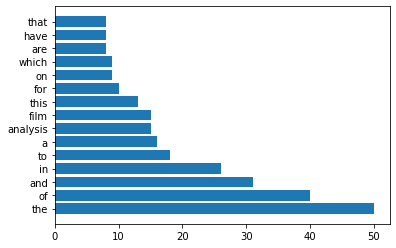

In [49]:

dh_words, dh_counts = zip(*word_bag.most_common(15))

import matplotlib.pyplot as plt
plt.barh(dh_words, dh_counts)

## Bonus Stage: Add On

Try:

- Iterating through multiple pages (all the pages of a database, for instance)

- Visualizing using another method from our discussion or readings

- Storing your data and / or visualization for external analysis
